In [1]:
import numpy as np
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import nltk

In [2]:
Fakenews = pd.read_csv("Fake.csv")

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
Truenews = pd.read_csv("True.csv")

In [4]:
Truenews.head(10)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,31-Dec-17
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,29-Dec-17
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,31-Dec-17
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,30-Dec-17
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,29-Dec-17
5,"White House, Congress prepare for talks on spe...","WEST PALM BEACH, Fla./WASHINGTON (Reuters) - T...",politicsNews,29-Dec-17
6,"Trump says Russia probe will be fair, but time...","WEST PALM BEACH, Fla (Reuters) - President Don...",politicsNews,29-Dec-17
7,Factbox: Trump on Twitter (Dec 29) - Approval ...,The following statements were posted to the ve...,politicsNews,29-Dec-17
8,Trump on Twitter (Dec 28) - Global Warming,The following statements were posted to the ve...,politicsNews,29-Dec-17
9,Alabama official to certify Senator-elect Jone...,WASHINGTON (Reuters) - Alabama Secretary of St...,politicsNews,28-Dec-17


In [5]:
Fakenews.head(3)

,title,text,subject,date,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 162,Unnamed: 163,Unnamed: 164,Unnamed: 165,Unnamed: 166,Unnamed: 167,Unnamed: 168,Unnamed: 169,Unnamed: 170,Unnamed: 171
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,31-Dec-17,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,31-Dec-17,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,30-Dec-17,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
i = 4
for i in range(172):
    if i>3:
        #print(i)
        Fakenews.drop(['Unnamed: %d' %(i)],  axis = 'columns' , inplace = True)
    
Fakenews.head(2)

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,31-Dec-17
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,31-Dec-17


In [7]:
Truenews.isna().any()

title      False
text       False
subject    False
date       False
dtype: bool

In [8]:
Fakenews.isna().any()

title      False
text       False
subject     True
date        True
dtype: bool

In [9]:
Fakenews[Fakenews.subject.isna()== True].head(5)

,title,text,subject,date
9731,ANTI-AMERICAN GEORGE SOROS Locks Arms With NFL...,We just discovered another reason NOT to suppo...,NaN,NaN
12407,WOW! AMERICA IS UNDER ATTACK By These 187 Orga...,There have been many articles written about Ge...,NaN,NaN
13362,A MUST READ! Here’s Why Voting For DONALD TRUM...,This is a must read for anyone who s undecided...,NaN,NaN
17852,ANTI-AMERICAN GEORGE SOROS Locks Arms With NFL...,We just discovered another reason NOT to suppo...,NaN,NaN
19625,WOW! AMERICA IS UNDER ATTACK By These 187 Orga...,There have been many articles written about Ge...,NaN,NaN


In [10]:
Fakenews.subject.isna().sum()

21

In [11]:
Fakenews1 = Fakenews.fillna('')

In [12]:
Fakenews1.isna().any()

title      False
text       False
subject    False
date       False
dtype: bool

In [13]:
Truenews['label'] = 0
Fakenews1['label']= 1

In [14]:
print(Truenews.shape)
Truenews.head(2)

(21417, 5)


,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,31-Dec-17,0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,29-Dec-17,0


In [15]:
print(Fakenews1.shape)
Fakenews1.head(2)

(23502, 5)


,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,31-Dec-17,1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,31-Dec-17,1


In [16]:
newdataset = pd.concat([Truenews,Fakenews1], axis = 0)

In [17]:
newdataset

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,31-Dec-17,0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,29-Dec-17,0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,31-Dec-17,0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,30-Dec-17,0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,29-Dec-17,0
...,...,...,...,...,...
23497,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,16-Jan-16,1
23498,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,16-Jan-16,1
23499,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,15-Jan-16,1
23500,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,14-Jan-16,1


In [18]:
newdataset.sample(20)

,title,text,subject,date,label
15940,Russian bombers hit militant targets in Syria'...,MOSCOW (Reuters) - Six long-range strategic bo...,worldnews,1-Nov-17,0
14114,WOMAN CRIES After Seeing How Easily Our Votes ...,There are people out there who are giving the...,politics,15-Apr-16,1
9291,NATO's top soldier says Trump comments play in...,SINGAPORE (Reuters) - NATO’s top military offi...,politicsNews,3-Jun-16,0
23089,CNN’s Don Lemon Tries to Downplay Horrific ‘An...,"In case you missed it, CNN anchor Don Lemon we...",Middle-east,6-Jan-17,1
18566,HILLARY APPEARS Wearing “Anti-Seizure” Sunglas...,Remember when experts came out after Hillary c...,left-news,30-May-17,1
13524,HOW HILLARY’S ANTI-COP Past And Support For Vi...,Maybe the Left became a bit too optimistic aft...,politics,14-Jul-16,1
1858,Syrian Air Base Trump Spent $80 Million Attac...,The Syrian air base Trump spent $80 million bo...,News,7-Apr-17,1
10427,#YouveBeenTrumped…Journalist Who Tried To Nail...,This is the dumbest and biggest crime in the h...,politics,11-Jul-17,1
19936,U.S. nearing limits of diplomacy on North Kore...,WASHINGTON (Reuters) - White House national se...,worldnews,15-Sep-17,0
21314,"Explain your results, beaten Angola party head...",LUANDA (Reuters) - The leader of Angola s main...,worldnews,26-Aug-17,0


In [19]:
newdataset.isna().sum()

title      0
text       0
subject    0
date       0
label      0
dtype: int64

In [20]:
newdataset['content'] = newdataset['title'] + ' ' + newdataset['text']

In [21]:
X = newdataset.drop('label', axis= 'columns')

In [22]:
X.head(20)

,title,text,subject,date,content
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,31-Dec-17,"As U.S. budget fight looms, Republicans flip t..."
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,29-Dec-17,U.S. military to accept transgender recruits o...
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,31-Dec-17,Senior U.S. Republican senator: 'Let Mr. Muell...
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,30-Dec-17,FBI Russia probe helped by Australian diplomat...
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,29-Dec-17,Trump wants Postal Service to charge 'much mor...
5,"White House, Congress prepare for talks on spe...","WEST PALM BEACH, Fla./WASHINGTON (Reuters) - T...",politicsNews,29-Dec-17,"White House, Congress prepare for talks on spe..."
6,"Trump says Russia probe will be fair, but time...","WEST PALM BEACH, Fla (Reuters) - President Don...",politicsNews,29-Dec-17,"Trump says Russia probe will be fair, but time..."
7,Factbox: Trump on Twitter (Dec 29) - Approval ...,The following statements were posted to the ve...,politicsNews,29-Dec-17,Factbox: Trump on Twitter (Dec 29) - Approval ...
8,Trump on Twitter (Dec 28) - Global Warming,The following statements were posted to the ve...,politicsNews,29-Dec-17,Trump on Twitter (Dec 28) - Global Warming The...
9,Alabama official to certify Senator-elect Jone...,WASHINGTON (Reuters) - Alabama Secretary of St...,politicsNews,28-Dec-17,Alabama official to certify Senator-elect Jone...


In [23]:
Y = newdataset.label 

In [24]:
Y.head(200)

0      0
1      0
2      0
3      0
4      0
      ..
195    0
196    0
197    0
198    0
199    0
Name: label, Length: 200, dtype: int64

In [25]:
nltk.download('stopwords')

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [26]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [27]:
#Steaming:

In [28]:
port_stem = PorterStemmer()

In [29]:
def steaming(context):
    stemmed_context = re.sub('[^a-zA-Z]',' ', context)
    stemmed_context = stemmed_context.lower()
    stemmed_context = stemmed_context.split()
    stemmed_context = [port_stem.stem(word) for word in stemmed_context if not word in stopwords.words('english')]
    stemmed_context = ' '.join(stemmed_context)
    return stemmed_context

In [30]:
X['content'] = X['content'].apply(steaming)

In [33]:
X.content

0        u budget fight loom republican flip fiscal scr...
1        u militari accept transgend recruit monday pen...
2        senior u republican senat let mr mueller job w...
3        fbi russia probe help australian diplomat tip ...
4        trump want postal servic charg much amazon shi...
                               ...                        
23497    mcpain john mccain furiou iran treat us sailor...
23498    justic yahoo settl e mail privaci class action...
23499    sunnistan us alli safe zone plan take territor...
23500    blow million al jazeera america final call qui...
23501    u navi sailor held iranian militari sign neoco...
Name: content, Length: 44919, dtype: object

In [46]:
x = X.content

In [47]:
x

0        u budget fight loom republican flip fiscal scr...
1        u militari accept transgend recruit monday pen...
2        senior u republican senat let mr mueller job w...
3        fbi russia probe help australian diplomat tip ...
4        trump want postal servic charg much amazon shi...
                               ...                        
23497    mcpain john mccain furiou iran treat us sailor...
23498    justic yahoo settl e mail privaci class action...
23499    sunnistan us alli safe zone plan take territor...
23500    blow million al jazeera america final call qui...
23501    u navi sailor held iranian militari sign neoco...
Name: content, Length: 44919, dtype: object

In [48]:
Y

0        0
1        0
2        0
3        0
4        0
        ..
23497    1
23498    1
23499    1
23500    1
23501    1
Name: label, Length: 44919, dtype: int64

In [49]:
vectorizer = TfidfVectorizer()

In [50]:
vectorizer.fit(x)

TfidfVectorizer()

In [51]:
x = vectorizer.transform(x)

In [55]:
print(x)

  (0, 88359)	0.03096273975211999
  (0, 88005)	0.02578424997856235
  (0, 87885)	0.04427774526335574
  (0, 86582)	0.04061602488686232
  (0, 86500)	0.018688497867248282
  (0, 85803)	0.03465841572966105
  (0, 85775)	0.0601625567405423
  (0, 85541)	0.01951118528158401
  (0, 85205)	0.026461590206443633
  (0, 85147)	0.020733173355255013
  (0, 85145)	0.044847224289589274
  (0, 85016)	0.035360655710833036
  (0, 85003)	0.04541141933632815
  (0, 84790)	0.019791591284202444
  (0, 84642)	0.03717931016552988
  (0, 84510)	0.07366199818134046
  (0, 84416)	0.060644787425099926
  (0, 83947)	0.08476411516785935
  (0, 82290)	0.018661178874757073
  (0, 82202)	0.03018856717171547
  (0, 81572)	0.018193995834523247
  (0, 80231)	0.022722175473623655
  (0, 79494)	0.09522744280705717
  (0, 79292)	0.12556154714223067
  (0, 79214)	0.04135330874450193
  :	:
  (44918, 7918)	0.03005688119195283
  (44918, 6634)	0.021705490578467712
  (44918, 6163)	0.016167761271203243
  (44918, 5524)	0.035726865550926246
  (44918, 536

# Spliting The Dataset into test band train

In [56]:
x_train, x_test, y_train, y_test = train_test_split(x, Y, test_size = 0.2, random_state=2, stratify = Y)

In [91]:
print(len(y_test))

8984


In [57]:
model = LogisticRegression()

In [58]:
model.fit(x_train,y_train)

LogisticRegression()

# Accuracy Score

In [59]:
#accuracy on train set
x_train_prediction = model.predict(x_train)

In [60]:
training_data_accuracy = accuracy_score(x_train_prediction,y_train)

In [61]:
training_data_accuracy

0.9920133574509531

In [62]:
#accuracy for the test set
x_test_prediction = model.predict(x_test)

In [63]:
test_data_accuracy = accuracy_score(x_test_prediction,y_test)

In [64]:
test_data_accuracy

0.98753339269813

In [85]:
model.score(x, Y)

0.9911173445535297

# Making a prediction Model

In [78]:
x_new = x_test[617]

pre = model.predict(x_new)
if pre == 1:
    print('Its a fake news')
else:
    print("its a real news ")

Its a fake news


In [77]:
y_test[617]

1

In [80]:
from sklearn.metrics import confusion_matrix

y_pred =model.predict(x_test)

cm =confusion_matrix(y_test, y_pred)
cm

array([[4238,   45],
       [  67, 4634]], dtype=int64)

In [81]:
%matplotlib inline
import matplotlib.pyplot as plt


Text(42.0, 0.5, 'Truth')

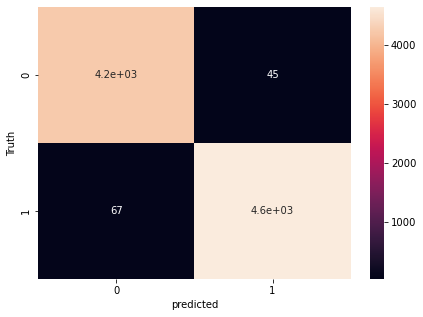

In [82]:
import seaborn as sn
plt.figure(figsize = (7,5))
sn.heatmap(cm, annot = True)
plt.xlabel('predicted')
plt.ylabel('Truth')

In [83]:
from  sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      4283
           1       0.99      0.99      0.99      4701

    accuracy                           0.99      8984
   macro avg       0.99      0.99      0.99      8984
weighted avg       0.99      0.99      0.99      8984



In [92]:
import pickle

In [93]:
with open ('model_pickle','wb') as f:
    pickle.dump(model,f)